In [45]:
%matplotlib inline
import astropy.units as u
from astropy.constants import G, k_B, m_p
import matplotlib.pylab as plt
import numpy as np

M_sun = 1.989e33

In [46]:
a = 1
sigma1 = 7
alpha = 3/2
sigma_solid = sigma1*a**-alpha
sigma_solid

7.0

In [47]:
f_gas = 240 # Hayashi 1981
sigma_gas = f_gas*sigma1*a**-alpha
sigma_gas

1680.0

In [48]:
temp = 2.8e2*a**(-1/2)
temp

280.0

In [49]:
H1 = 0.047
rho1 = f_gas*sigma1/(np.sqrt(np.pi)*(H1*u.AU).to(u.cm).value)
rho_gas = rho1*a**(-alpha-5/4)
rho_gas

1.3480657518081347e-09

In [139]:
a_cm = (a*u.AU).to(u.cm).value

M = 1e23
rh = (M/(3*M_sun))**(1/3)*a_cm

omega = np.sqrt(G.cgs.value*M_sun/a_cm**3)

logLam = 3
b = 5*rh
e = np.logspace(-4, -1)
i = e/2
vk = np.sqrt(G.cgs.value*M_sun/a_cm)
v = e*vk
nm = 1/(2*np.pi*a_cm*b*2*a_cm*i)
h = v/omega
#nm = sigma_solid/(M*h)
T_vs = v**3/(np.pi*G.cgs.value**2*nm*M**2*logLam)

In [140]:
CD = 1
rho_pl = 2
r = (3*M/(4*np.pi*rho_pl))**(1/3)

eta = 0.002
cs = H1*a_cm*omega
n = 0.5
u_gas = v#k*(1 - np.sqrt(1 - 2*n*cs**2/vk**2))
print(u_gas)
T_gas = 2*M/(CD*np.pi*r**2*rho_gas*u_gas)

[   297.88620358    342.98480432    394.91112573    454.69885331
    523.53816778    602.79943776    694.06049935    799.1380658
    920.12389239   1059.42641651   1219.8187019    1404.49364138
   1617.12751706   1861.95318327   2143.84432898   2468.41249726
   2842.11879298   3272.40250258   3767.82918622   4338.26119046
   4995.05397577   5751.28216709   6621.99982741   7624.54013562
   8778.86043413  10107.93951519  11638.23505446  13400.21029799
  15428.94048711  17764.81109334  20454.32176277  23551.011974
  27116.52683635  31221.84424508  35948.68782227  41391.15377039
  47657.58402404  54872.72298829  63180.20079724  72745.39252646
  83758.71027716  96439.39366664 111039.8741816  127850.80027448
 147206.82323624 169493.25902367 195153.7586567  224699.13987859
 258717.55588882 297886.20357537]


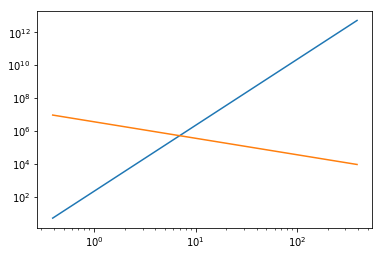

In [144]:
# Matches up well using exact equations from KI 2002
e_h = e*a_cm/rh
plt.plot(e_h, T_vs/3.15e7)
#plt.plot(e_h, T_vs1/3.15e7)
plt.plot(e_h, T_gas/3.13e7)
#plt.axhline(T_gas/3.15e7, ls='--')
plt.xscale('log')
plt.yscale('log')

In [153]:
a_cm = (a*u.AU).to(u.cm).value

M = 1e23
rh = (M/(3*M_sun))**(1/3)*a_cm

omega = np.sqrt(G.cgs.value*M_sun/a_cm**3)

logLam = 3
e = np.logspace(-4, -1)
i = e/2
vk = np.sqrt(G.cgs.value*M_sun/a_cm)
v = e*vk
h = v/omega
nm = sigma_solid/(2*M*h)
T_vs = v**3/(np.pi*G.cgs.value**2*nm*M**2*logLam)

In [154]:
CD = 1
rho_pl = 2
r = (3*M/(4*np.pi*rho_pl))**(1/3)

cs = H1*a_cm*omega
n = 0.5
u_gas = vk*(1 - np.sqrt(1 - n*cs**2/vk**2))
print(u_gas)
T_gas = 2*M/(CD*np.pi*r**2*rho_gas*u_gas)

1645.531057040857


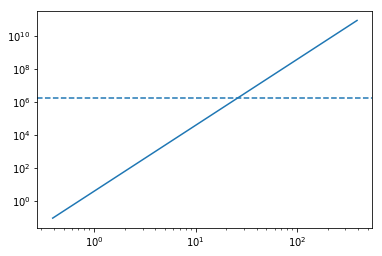

In [155]:
e_h = e*a_cm/rh
plt.plot(e_h, T_vs/3.15e7)
#plt.plot(e_h, T_gas/3.13e7)
plt.axhline(T_gas/3.15e7, ls='--')
plt.xscale('log')
plt.yscale('log')